In [1]:
import math
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [3]:
#displaying all the columns of the diamond dataset
df.columns

Index(['Unnamed: 0', 'cut', 'color', 'clarity', 'carat_weight', 'cut_quality',
       'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size',
       'culet_condition', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

In [4]:
df.shape 
#gives the rows and columns of the dataset

(219703, 26)

Now we will use the describe() function which provides basic statistics about the numeric columns in the DataFrame. It includes metrics like count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.

In [5]:
df.describe()

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


BOX PLOTS

Box Plot displays the five-number summary of a set of data with the help of a box and a few verticle lines.



*   Minimum: Q1-1.5*IQR
*   1st quartile (Q1): 25th percentile
*   Median:50th percentile
*   3rd quartile(Q3):75th percentile
*   Maximum: Q3+1.5*IQR

IQR - Inter Quartile Range (region between 1st quartile and 3rd quartile\). 50% of the total data lies in this region.

The box plot also allows to discover the outliers, the points beyond the vertical lines, i.e. the points lying in Minimum and Maximum regions.


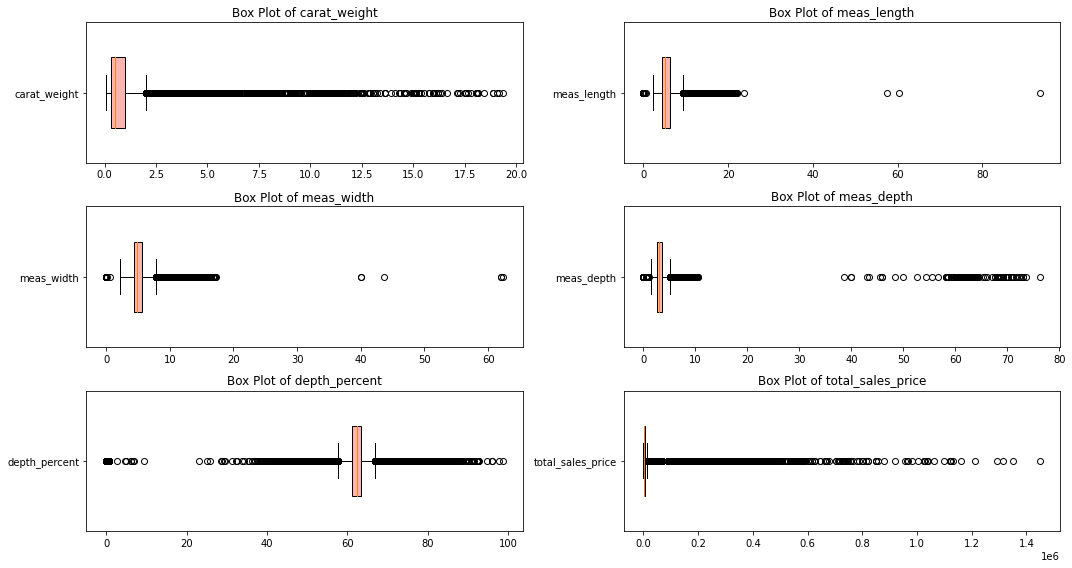

In [32]:
palette = 'Pastel1'
n_colors = 14

attributes = ['carat_weight', 'meas_length', 'meas_width', 'meas_depth', 'depth_percent', 'total_sales_price']

num_attributes = len(attributes)
num_columns = 2  # Number of columns in the grid
num_rows = -(-num_attributes // num_columns)  # Ceiling division to calculate the number of rows

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 8))
axes = axes.flatten()

for idx, attribute in enumerate(attributes):
    ax = axes[idx]
    box_plot = ax.boxplot(df[attribute], vert=False, widths=0.5, patch_artist=True)

    colors = plt.cm.get_cmap(palette, n_colors)
    for box, color in zip(box_plot['boxes'], colors(range(n_colors))):
        box.set(facecolor=color)

    ax.set_yticklabels([attribute])
    ax.set_title(f'Box Plot of {attribute}')

plt.tight_layout()
plt.show()

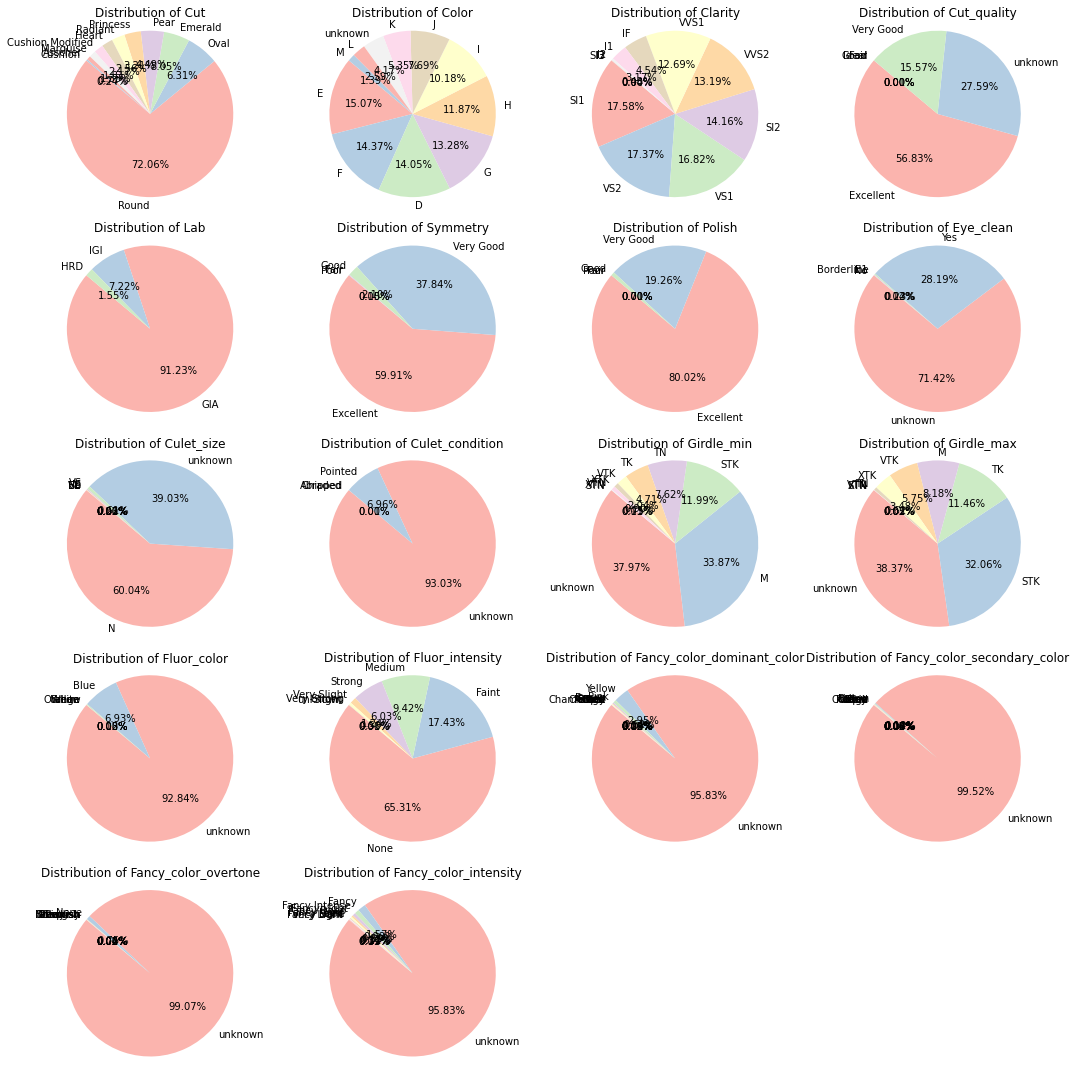

In [12]:
features = ["cut", 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition',
            'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 
            'fancy_color_overtone', 'fancy_color_intensity', ]

# Set up the grid of subplots
num_rows = 5  # Number of rows in the grid
num_cols =  4 # Number of columns in the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))


# Define a color palette using Seaborn's 'Pastel1' colormap
color_palette = sns.color_palette('Pastel1')

# Flatten the axes array for easier iteration
axes = axes.flatten()

for idx, feature in enumerate(features):
    feature_counts = df[feature].value_counts()
    labels = feature_counts.index
    sizes = feature_counts.values
    colors = color_palette[:len(labels)]

    ax = axes[idx]  # Get the current subplot

    # Create the pie chart on the current subplot
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
    ax.set_title(f'Distribution of {feature.capitalize()}')
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

#not displaying the empty subplots
for i in range(len(features), num_rows * num_cols):
    axes[i].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

It's evident that certain features such as 'cut', 'cut_quality', 'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size', 'culet_condition', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', and 'fancy_color_intensity' exhibit a notable preference towards a specific value, as more than 60% of the diamonds tend to lean towards that particular value.
For each of the attributes mentioned, a particular value seems to be favored by more than 60% of the diamonds. This suggests a strong trend or preference in the dataset. The prevalence of specific values indicates a potential industry standard or common preference among customers.


Features like 'color', 'clarity', 'girdle_min' and 'girdle_max' show a more evenly distributed data.
 These features exhibit a more uniform distribution, indicating that there is no strong bias or preference toward specific values. The values are spread out across the available range.
 In the context of diamonds, 'color' and 'clarity' are often used to differentiate and classify diamonds into various quality grades. An even distribution suggests that diamonds with different colors or clarity grades are present in the dataset.

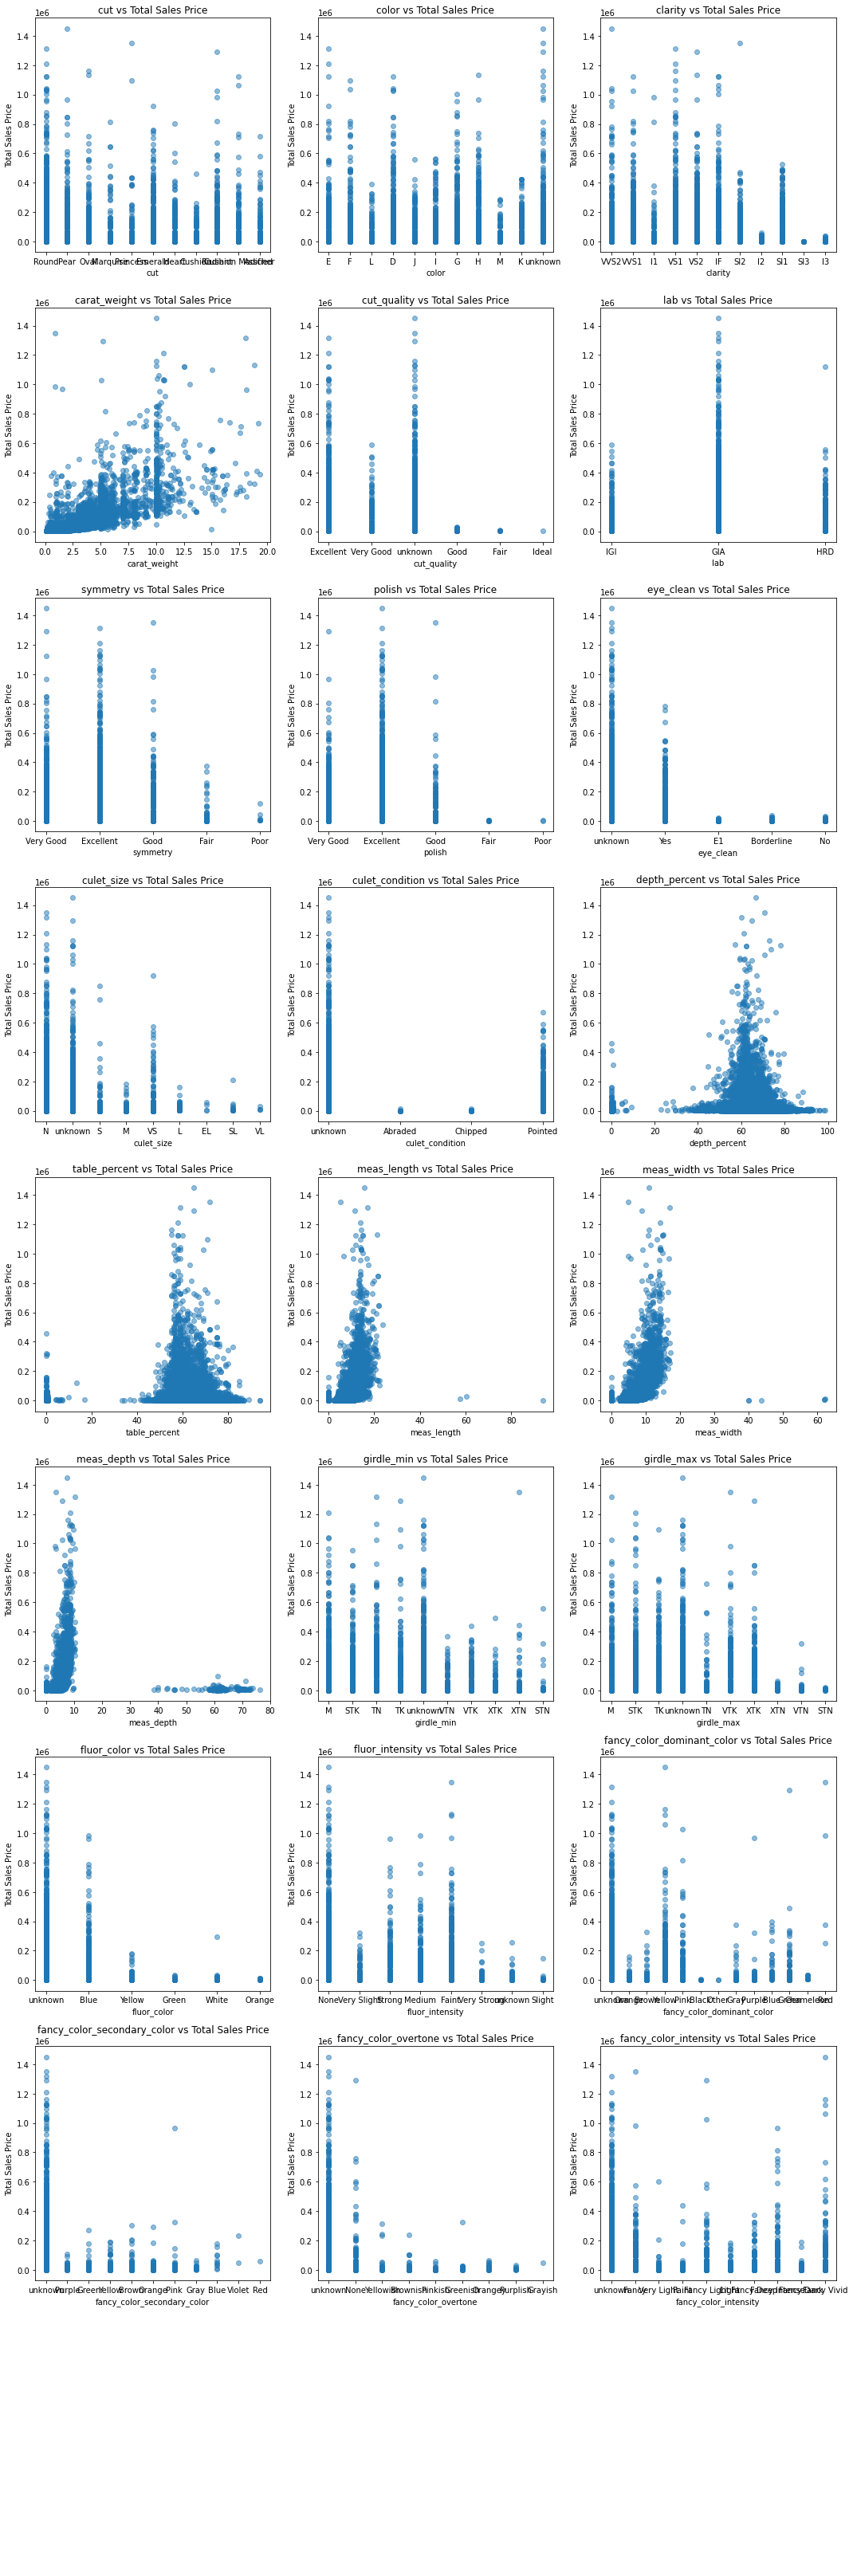

In [13]:
# List of all features (excluding the target variable)
features = [col for col in df.columns if (col != 'total_sales_price' and col!='Unnamed: 0')]

# Define the number of rows and columns for subplots
num_rows = len(features) // 3 + 1
num_cols = 3

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Loop through each feature and create scatter plots
for i, feature in enumerate(features):
    ax = axes[i]
    ax.scatter(df[feature], df['total_sales_price'], alpha=0.5)
    ax.set_xlabel(feature)
    ax.set_ylabel('Total Sales Price')
    ax.set_title(f'{feature} vs Total Sales Price')

#not displaying the empty subplots
for i in range(len(features), num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


We can see that for better polish and symmetry, the sale price is also high which is an expected behviour.

Also, for a greater meas length, meas depth and meas width, the sale price is more which is again expected as if the size of the diamond increase, the price will increase too.

Certain features like 'culet_condition', 'eye_clean', 'fluor_color', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone' and 'fancy_color_intensity' have more data which is unknown and so we can't really comment about their relationship with the total sale price.


A high correlation can be seen with 'carat_weight', 'meas_length', 'meas_width', 'meas_depth' and 'depth_percent'. So lets analyze it further:

<AxesSubplot: xlabel='carat_weight', ylabel='meas_length'>

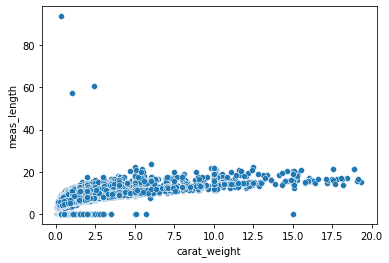

In [14]:
sns.scatterplot(x=df["carat_weight"], y=df["meas_length"])

<AxesSubplot: xlabel='carat_weight', ylabel='meas_depth'>

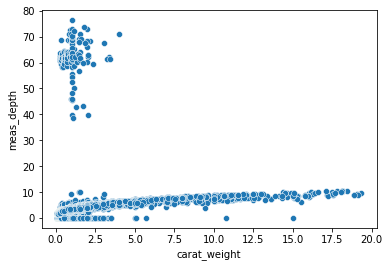

In [15]:
sns.scatterplot(x=df["carat_weight"], y=df["meas_depth"])

<AxesSubplot: xlabel='carat_weight', ylabel='meas_width'>

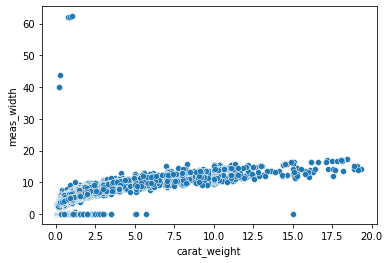

In [16]:
sns.scatterplot(x=df["carat_weight"], y=df["meas_width"])

<AxesSubplot: xlabel='meas_depth', ylabel='meas_width'>

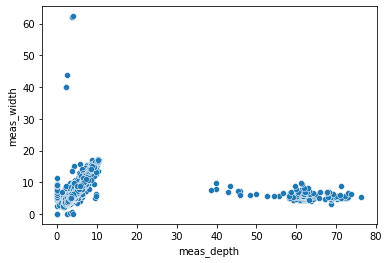

In [17]:
sns.scatterplot(x=df["meas_depth"], y=df["meas_width"])

<AxesSubplot: xlabel='meas_depth', ylabel='depth_percent'>

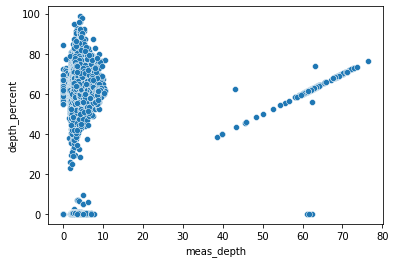

In [18]:
sns.scatterplot(x=df["meas_depth"], y=df["depth_percent"])

<AxesSubplot: xlabel='carat_weight', ylabel='depth_percent'>

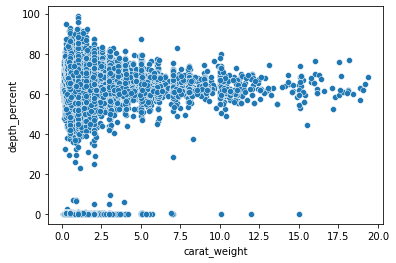

In [19]:
sns.scatterplot(x=df["carat_weight"], y=df["depth_percent"])

From the above plots we can conclude that there is a heavy correlation between carat weight, meas length, meas width, meas depth and depth percent.

The positive correlation between 'carat weight' and 'meas length', 'meas width', 'meas depth' is expected. Diamonds with larger dimensions tend to have higher carat weights. This is because carat weight is a measure of a diamond's mass, which is closely related to its physical size.

The correlation between 'depth percent' and 'meas depth' might indicate that 'depth percent' is influenced by the physical depth of the diamond. Depth percentage is calculated as the ratio of 'meas depth' to 'meas width', so it makes sense that these two attributes are correlated.

To better understand the correlation between these features, we can also plot their pairplots.

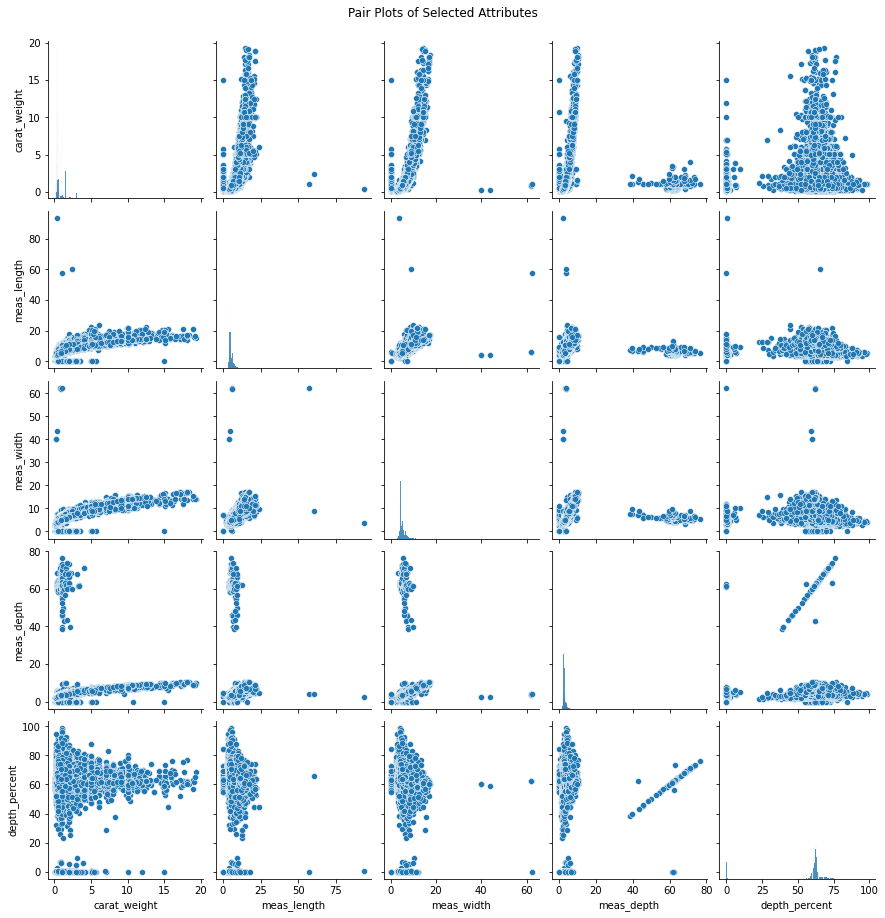

In [20]:
# Select the attributes for pair plots
attributes = ['carat_weight', 'meas_length', 'meas_width', 'meas_depth', 'depth_percent']

# Create pair plots
sns.pairplot(df[attributes])
plt.suptitle('Pair Plots of Selected Attributes', y=1.02)
plt.show()

**Finding the Nulls in dataset**
---

Now we use the isnull() function to find the null values in the dataset.

In [21]:
df.isnull().sum()

Unnamed: 0                     0
cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64

So there is no data which is either NULL or lost.

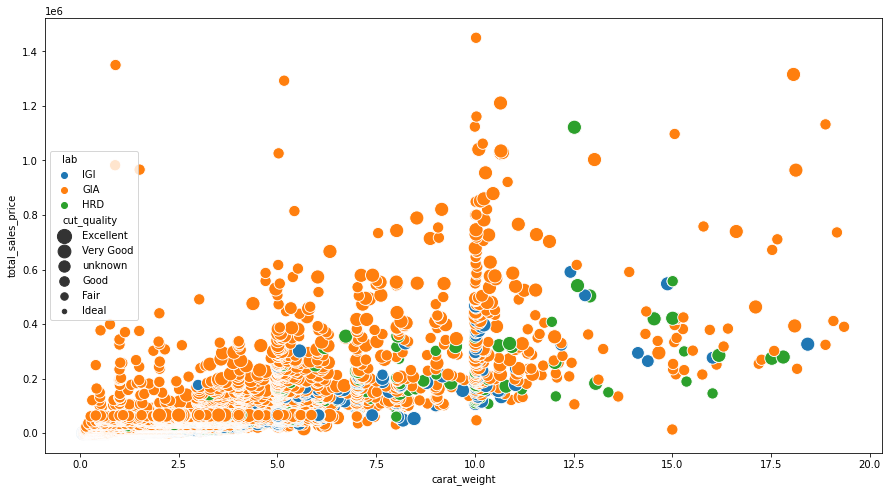

In [22]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["carat_weight"], y=df["total_sales_price"], hue=df["lab"], size=df["cut_quality"], sizes=(20, 200), legend="full")

From this plot, we can analyse that most of the diamonds have grading lab as 'GIA' certificate. Secondly, the cut quality of most of the diamonds is either Very Good, unknown or Execellent based on the sizes of the data points shown in the plot. 

Also, we can see that the total sales price is mostly within the range of 10,00,000 to 20,00,000 dollars. Also, the carat weight of the diamond is mostly within 0-2.5 g. 

We can see that there are certain verticle lines for example, carat weight 10 is very prominent hence showing that there is a larger reception in market for diamonds with carat weight 10.

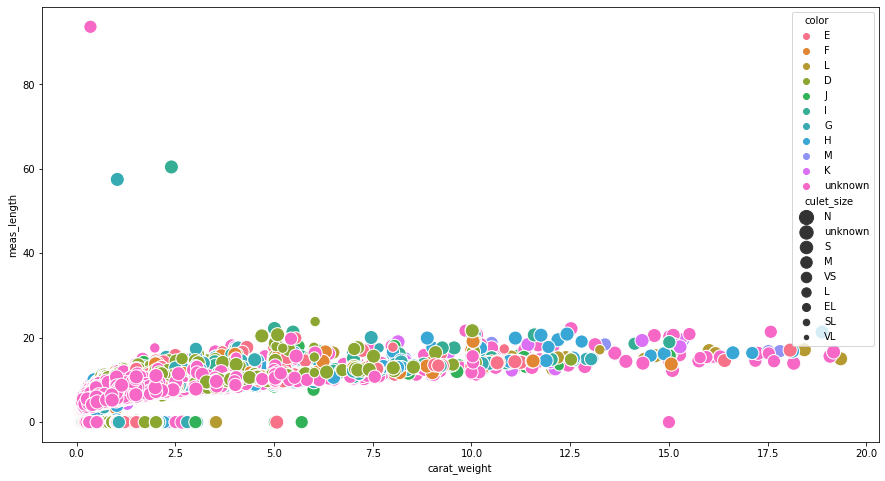

In [23]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["carat_weight"], y=df["meas_length"], hue=df["color"], size=df["culet_size"], sizes=(20, 200), legend="full")

As can be easliy seen from the graph, we can say that the carat weight and meas length have a linear increasing relationship between them. 
Majority of the diamonds have a culet size of 'N' as per the size of the data points. 
The data is evenly distributed in the case of colors as we can see multiple colors in the graph without one dominating the whole graph.

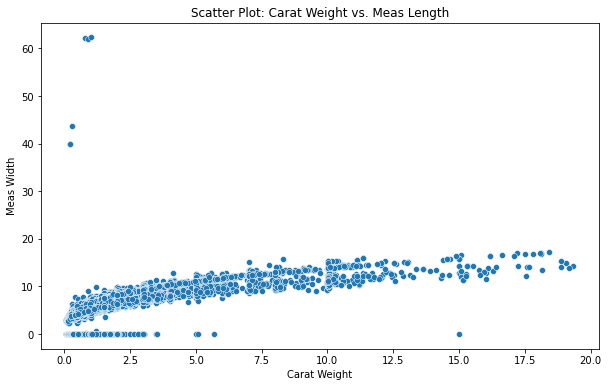

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat_weight', y='meas_width', data=df)
plt.title('Scatter Plot: Carat Weight vs. Meas Length')
plt.xlabel('Carat Weight')
plt.ylabel('Meas Width')
plt.show()

As the carat weight increases, the meas width increases monotonically.

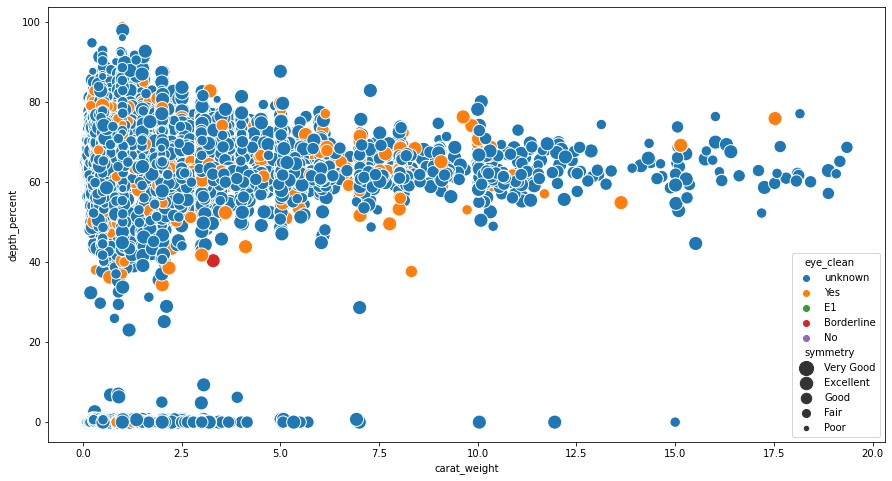

In [25]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["carat_weight"], y=df["depth_percent"], hue=df["eye_clean"], size=df["symmetry"], sizes=(20, 200), legend="full")

We can see that for most of the diamonds, the eye cleanness is 'not known' followed bye 'yes'(which means that diamond appears clean to the naked eye).

Also majority of diamonds have depth percent of around 60-80, with Very good/Excellent symmetry.

From all the above plots, we can summarize that there is a strong relatioship among carat weight, meas length, meas width, meas depth and depth percent. Hence, these will be our essential features for the training of the data set. 

<AxesSubplot: >

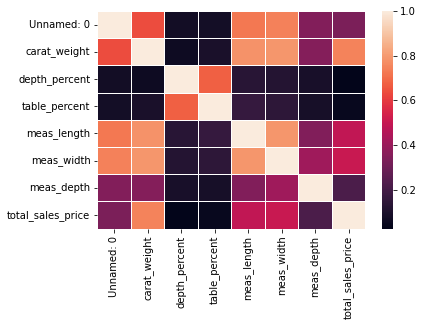

In [26]:
sns.heatmap(data=df.corr(), lw = 1)